## Detecting Audio Deep Fakes TF2

By: Alexander Comerford

In this notebook we will be using bispectral analysis features and classifiers to detect real vs. synthetic speech (deep fakes).

Throughout this notebook we will be implementing some of the raw functionality using tensorflow 2

### Overview

Deep fakes are the art of producing realistic human like data that is indistinguishable to humans through the modeling methods of deep learning.

With recent advances in machine learning, dramatic improvements to human like audio generated by machines are becoming more difficult to detect even by a trained ear.

Below we can hear a sample of one such model [WaveNet](https://deepmind.com/blog/wavenet-generative-model-raw-audio/)

In [1]:
from IPython import display

In [2]:
display.Audio("https://storage.googleapis.com/deepmind-media/pixie/us-english/wavenet-1.wav")

We can also listen to more modern models that are sensative to intonation by punctuation. Namely [tacotron2](https://google.github.io/tacotron/publications/tacotron2/)

In [3]:
display.Audio("https://google.github.io/tacotron/publications/tacotron2/demos/ghome_comma.wav")

Due to the relative realness of these synthetic audio clips, it comes into question how can we discern these two in an automatic fashion without the human ear. This type of automatic detection is what we will try to accomplish in this notebook.

### Overview

Throughout the rest of this notebook we will develop a detection method for these deep fakes against human synthesized audio using techniques in bispectral analysis shown [here](http://www.cs.albany.edu/~lsw/papers/cvprw19b.pdf).

We will create functions to compute a small representation of the bicoherence for a signal and utilize features extracted from this bicoherence to classify audio as either real or synthetic

### Imports

Below we will import all the libraries we need to do this analysis. Specifically we will be using tensorflow 2 to do our computations.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
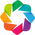

In [36]:
from math import *
import numpy as np
import tensorflow as tf
from scipy.io import wavfile

import os
import glob
from itertools import product
from functools import lru_cache, reduce
import nbformat
from IPython.display import display
from PIL import Image 

import holoviews as hv
hv.extension('bokeh')

## Calculating toeplitz

First we will be defining a few utility functions which we will need to achieve our goal. Our start begins at toeplitz matrices

An example of a toeplitz matrix is like the one below
\begin{pmatrix}
2 & -1 & 0 & \cdots & \cdots & \cdots & \cdots & 0\\
-1 & 2 & -1 & 0 & & & & \vdots\\
0 & -1 & 2 & -1 & \ddots & & & \vdots\\
\vdots & 0 & \ddots & \ddots & \ddots & \ddots & & \vdots\\
\vdots & & \ddots & \ddots & \ddots & \ddots & 0 & \vdots\\
\vdots & & & \ddots & -1 & 2 & -1 & 0\\
\vdots & & & & 0 & -1 & 2 & -1\\
0 & \cdots & \cdots  & \cdots & \cdots & 0 & -1 & 2\\
\end{pmatrix}

These types of matrices are characterized 

$T_{i,j} = T_{i+1,j+1} = a_{i-j}$

Where $i$ and $j$ are the coordinates of the matrix characterized by their cascading diagonal values at locations on the first row and column of the matrix

Using a column and a row as paramaters we will implement this function in tensorflow 2 to use later when calculating the third order cumulant. Tensorflow 2 does have a [toeplitz function](https://www.tensorflow.org/api_docs/python/tf/linalg/LinearOperatorToeplitz) but it doesn't support rectangular toeplitz :(

In [37]:
@tf.function
def create_toeplitz(column, row):
    column = tf.squeeze(column)
    
    ## Single dimension of mirrored col and row
    vals = tf.concat((row[-1:0:-1], column), axis=0)

    ## Produce indexes of toeplits
    indx = ( tf.expand_dims(tf.range(len(column)), 1) +
             tf.expand_dims(tf.range(len(row) - 1, -1, -1), 0) )
    
    ## Compute toeplitz from indexes and mirrored col+row values
    toep = tf.gather(vals, indx)
    return toep

In [38]:
( create_toeplitz(np.array([4,3,5,7]),
                  np.array([5,2,3,4])),
  create_toeplitz(np.array([1,3,]),
                  np.array([1,3])) )

(<tf.Tensor: id=28046, shape=(4, 4), dtype=int64, numpy=
 array([[4, 2, 3, 4],
        [3, 4, 2, 3],
        [5, 3, 4, 2],
        [7, 5, 3, 4]])>,
 <tf.Tensor: id=28076, shape=(2, 2), dtype=int64, numpy=
 array([[1, 3],
        [3, 1]])>)

## Calculating the third order cumulant

In order to calculate the bispectrum of a signal we first need to calculate it's third order cumulant which is the product of a signal given two seperate lagging variables shown below where $x(t)$ is our input signal as a function of time.


$R(\tau_{1}, \tau_{2}) = \delta \left [ x(t)x(t+\tau_{1})x(t+\tau_{2}) \right ]$ [[1]](https://globaljournals.org/GJSFR_Volume13/5-A-Review-of-Higher-Order-Statistics.pdf)

The resulting computation gives us a 2d matrix with rows and colums representing the multiplicative lags of the signal.

Below we will implement this computation in tensorfloat32w 2 based on a matlab implementation found [here](https://www.mathworks.com/matlabcentral/fileexchange/60-bisp3cum). This implementation will be minimalist lacking windowing or unbiased scaling.

In [22]:
@tf.function
def create_cumulant3(signal):
    
    signal = tf.cast(signal, tf.float64)
    n = signal.get_shape()[0] # Get size of the signal
    dt = 1.0                  # time difference
    fs = 1.0                  # sampling
    
    # time as a monotonic function
    time = tf.range(n, dtype=tf.float64) 
    dt_array = tf.ones(n, dtype=tf.float64)

    # calculate default max_lag as half the signal length
    max_lag = int(n / 2)
    
    # converting to a row vector and normalize
    signal = tf.reshape(signal, (1, n))    
    signal = signal - tf.math.reduce_mean(signal)
    
    # Initial zeroes matrix of cumulant3
    cumulant3_dim = 2 * max_lag + 1
    cumulant3 = tf.zeros((cumulant3_dim, cumulant3_dim), dtype=tf.float64)
    
    # calculate different lag values
    lags = tf.range(-max_lag, max_lag + 1, dtype=tf.float64) * dt  
   
    # Defines indices for matrices
    ind = tf.range((n - max_lag) - 1, n)
    ind_t = tf.range(max_lag, n)
    zero_max_lag = tf.zeros((1, max_lag), dtype=tf.float64)
    zero_max_lag_t = tf.transpose(zero_max_lag)
    
    # Compute prelim column and row values for teoplitz
    sig = tf.transpose(signal)
    reverse_signal = tf.reverse(signal, [1])

    # Calculate raw row and column for toeplitz
    # cut the first element if it's an odd signal length
    col = tf.concat((tf.gather(sig, ind), zero_max_lag_t), axis=0)
    row = tf.concat((tf.gather(reverse_signal, ind, axis=1)[0,(1 if n%2==0 else 0):], 
                     zero_max_lag[0]), axis=0)
    
    # Get toeplitz
    toep = create_toeplitz(col, row)
    
    # Tile signal over n rows
    reverse_signal = tf.tile(reverse_signal, [cumulant3_dim, 1])
    
    # Calculate third order cumulant by multiplying
    # the reversed signal by the lagged toeplitz matrix
    cumulant3 = cumulant3 + \
           tf.linalg.matmul(
                tf.math.multiply(toep, reverse_signal), 
                tf.transpose(toep))
    
    ## Biased normalize
    cumulant3 = cumulant3 / n
    
    return cumulant3

In [23]:
faux_signal = np.sin(np.arange(0, 2*pi, 0.1, dtype=np.float64))
create_cumulant3(faux_signal)

<tf.Tensor: id=14260, shape=(63, 63), dtype=float64, numpy=
array([[-2.11484792e-01, -2.09989400e-01, -2.06396139e-01, ...,
         5.80778916e-05,  7.65629592e-06, -6.09662531e-09],
       [-2.09989400e-01, -2.09553699e-01, -2.07024457e-01, ...,
         7.62808863e-05,  3.14378198e-06, -5.53354302e-06],
       [-2.06396139e-01, -2.07024457e-01, -2.05562180e-01, ...,
         9.96828721e-06, -6.39981564e-05, -5.18223506e-05],
       ...,
       [ 5.80778916e-05,  7.62808863e-05,  9.96828721e-06, ...,
         2.05504562e-01,  2.06966624e-01,  2.06340398e-01],
       [ 7.65629592e-06,  3.14378198e-06, -6.39981564e-05, ...,
         2.06966624e-01,  2.09497638e-01,  2.09933849e-01],
       [-6.09662531e-09, -5.53354302e-06, -5.18223506e-05, ...,
         2.06340398e-01,  2.09933849e-01,  2.11429434e-01]])>

## Calculating the bispectrum and bicoherence

Now that we have a function to compute the third order cumulant we can now define smaller functions to compute the bispectrum and bicoherence of a signal.

This is trivial due to the bispectrum being defined as the 2d fourier transform of the third order cumulant.

Using the notation described above and by the provided reference we can define the bispectrum  as

$B(f_{1}, f_{2}) = \sum_{n_{1} = -\infty}^{\infty} \sum_{n_{2} = -\infty}^{\infty} R(\tau_{1}, \tau_{2}) exp[- j 2 \pi (f_{1}n_{1} + f_{2}n_{2})]$

In [27]:
@tf.function
def tf_round(x, decimals = 0):
    multiplier = tf.constant(10**decimals, dtype=x.dtype)
    return tf.round(x * multiplier) / multiplier

In [28]:
@tf.function
def calculate_bispectrum(signal):
    ## Create the third order cumuland
    ## and normalize
    cumulant3 = tf_round(create_cumulant3(signal), 8)
    
    ## Create 2d fourier transform of
    ## third order cumuland
    bispectrum = tf.signal.fftshift(
                        tf.signal.fft2d(
                            tf.cast(tf.signal.ifftshift(cumulant3), tf.complex128)))
    
    return bispectrum

We can visualize these quantaties with a fake signal

In [29]:
faux_signal = tf.math.sin(tf.range(0, 2*pi, 0.1, dtype=tf.float32))

bispectrum_mag = lambda signal: tf.math.abs(calculate_bispectrum(signal))
bispectrum_phase = lambda signal: tf.math.angle((calculate_bispectrum(signal)))

display(hv.Image(bispectrum_mag(faux_signal).numpy()).opts(title="bispectrum magnitude"))
display(hv.Image(bispectrum_phase(faux_signal).numpy()).opts(title="bispectrum phase"))

:Image   [x,y]   (z)

:Image   [x,y]   (z)

## Creating a bicoherence signature

Calculating the full bispectrum of a waveform is very expensive and takes alot of memory to compute. In order to compute a compressed statistical representation of the bispectrum such that we can compute the bicoherence we will compute the bispectrum of windowed segments of the waveform. Lastly we will compute the normalized bicoherence described with the formula below. 

$B(f_{1},f_{2})={\frac {\left|\sum \limits _{n}F_{n}(f_{1})F_{n}(f_{2})F_{n}^{*}(f_{1}+f_{2})\right|}{\sum \limits _{n}|F_{n}(f_{1})F_{n}(f_{2})F_{n}^{*}(f_{1}+f_{2})|}}$

The final output produces a signature of the input waveform (or user speech) in the form of the bicoherence. The bicoherence will contain artifacts about the input speech which can be used to create features.

In [17]:
def factors(n):    
    '''Stack overflow: https://stackoverflow.com/questions/6800193/what-is-the-most-efficient-way-of-finding-all-the-factors-of-a-number-in-python'''
    return list(set(reduce(list.__add__, 
                    ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0))))

In [18]:
@tf.function
def windowed_bicoherence(signal, window=32, step_size=16, parallel_iterations=1000, chunk_factor_index=-2):
    
    ## cast signal
    signal = tf.cast(signal, tf.float64)

    ## Initialize sum tensors
    bispectrum_sum = tf.zeros((window+1, window+1), dtype=tf.complex128)
    bispectrum_magnitude_sum = tf.zeros((window+1, window+1), dtype=tf.complex128)
    bispectrum_phase_sum = tf.zeros((window+1, window+1), dtype=tf.complex128)
    
    ## Get index values for chunks, window starts, and process chunk sizes
    num_chunks = ((len(signal)-window)//step_size) + 1
    window_indexes = tf.range(0, num_chunks * step_size, step_size)
    window_indexes_chunk_size = factors(len(window_indexes))[chunk_factor_index]
    
    for i in tf.range(0, len(window_indexes), window_indexes_chunk_size):
        
        ## Use an index map to gather a sliding window of
        ## sequences from the signal
        window_range_index_map = \
            tf.tile(
                tf.reshape(tf.range(0,window),
                           (1, window)), 
            [window_indexes_chunk_size, 1])
        
        tiled_index_chunks = \
            tf.transpose(
                tf.tile(
                    tf.reshape(window_indexes[i:i+window_indexes_chunk_size], 
                               (1,window_indexes_chunk_size)), 
                    [window, 1]))
        
        ## Index the signal with index_map to get a matrix [chunk, window]
        ## for parallel processing in while_loop
        index_map = window_range_index_map + tiled_index_chunks
        segment_signal = tf.cast(tf.gather(signal, index_map), dtype=tf.complex128)
        
        ## Parallel while loop to compute the windowed bispectrum
        ## of a signal
        i = tf.constant(0)
        
        ## Simple iter condition
        cond = lambda i, segment_signal, window_indexes_chunk_size, bispectrum_sum, bispectrum_magnitude_sum, bispectrum_phase_sum: \
                    i < window_indexes_chunk_size

        ## Use bispectrum once to compute magnitude and phase
        def body(i, segment_signal, window_indexes_chunk_size, bispectrum_sum, bispectrum_magnitude_sum, bispectrum_phase_sum):

            bispectrum = calculate_bispectrum(segment_signal[i,:])
            
            return [
                i+1,
                segment_signal,
                window_indexes_chunk_size,
                bispectrum_sum + bispectrum,
                bispectrum_magnitude_sum + tf.cast(tf.math.abs(bispectrum), tf.complex128),
                bispectrum_phase_sum + tf.cast(tf.math.angle(bispectrum), tf.complex128)
            ]
                
        ## Run the while loop for computing windowed bicoherence 
        ## with parallel iterations
        ## Let tf2 code generation & optimization do its thing!!! :D
        _,_,_,bispectrum_sum, bispectrum_magnitude_sum, bispectrum_phase_sum = \
                tf.while_loop(cond, body,
                              [i, segment_signal, window_indexes_chunk_size, bispectrum_sum, bispectrum_magnitude_sum, bispectrum_phase_sum],
                              parallel_iterations=parallel_iterations)

    bicoherence_normal = tf.cast(tf.math.abs(bispectrum_sum), tf.complex128) / bispectrum_magnitude_sum
    bicoherence_phase = tf.divide(bispectrum_phase_sum, num_chunks)
    return bicoherence_normal, bicoherence_phase

## Visualization of bicoherence magnitude and phase

Now that we have a function to calculate the statistical representation of bicoherence relatively cheaply, we can see what the resulting computation looks like as we shift a fake signals phase or frequency.

In [19]:
%%time

frequencies = [1, 2, 3, 4, 5]
phases = [0, pi / 2, pi, 3 * pi / 2, 2 * pi]

def make_faux_signal(freq, pha):
    return ( tf.math.sin(2  * freq * tf.range(0, 2*pi, 0.05, dtype=tf.float32) + pha / 1) +
             tf.math.cos(1  * freq * tf.range(0, 2*pi, 0.05, dtype=tf.float32) + pha / 3) +
             tf.math.sin(10 * freq * tf.range(0, 2*pi, 0.05, dtype=tf.float32) + pha / 2) )

def make_bicoherence(faux_signal):
    params = dict(window = 32,
                  step_size = 16,
                  parallel_iterations = 1000,
                  chunk_factor_index = -3)

    bicoherence_normal, bicoherence_phase = windowed_bicoherence(faux_signal, **params)
    bicoherence_normal, bicoherence_phase = \
            tf.cast(bicoherence_normal, tf.float64), tf.cast(bicoherence_phase, tf.float64)
    
    return bicoherence_normal, bicoherence_phase

specs_normal = {}
specs_phase = {}
for f,p in product(frequencies, phases):
    normal, phase = make_bicoherence(make_faux_signal(f,p))
    specs_normal[(f,p)] = hv.Image(normal.numpy())
    specs_phase[(f,p)] = hv.Image(phase.numpy())
    
display(
    hv.HoloMap(specs_normal, kdims=["frequency","phase"]).opts(title="windowed bispectrum magnitude"))
display(
    hv.HoloMap(specs_phase, kdims=["frequency","phase"]).opts(title="windowed bispectrum phase"))

:HoloMap   [frequency,phase]
   :Image   [x,y]   (z)

:HoloMap   [frequency,phase]
   :Image   [x,y]   (z)

CPU times: user 2.88 s, sys: 112 ms, total: 2.99 s
Wall time: 2.56 s


## Data collection

Now that we have our primary functions to do this computation, we will now create a data collection function
which we will provide a `glob` path for `.wav` files as the input format

In [34]:
def collect_data(glob_path):
    i = tf.constant(0)
    
    file_paths = list(glob.glob(glob_path))[:20]
    
    mean_magnitudes = tf.convert_to_tensor([], dtype=tf.float64)
    mean_phases = tf.convert_to_tensor([], dtype=tf.float64)

    ## Simple iter condition
    cond = lambda i, file_paths, mean_magnitudes, mean_phases: \
                i < len(file_paths)

    ## Use bispectrum once to compute magnitude and phase
    def body(i, file_paths, mean_magnitudes, mean_phases): 
        
        params = dict(window = 32,
                      step_size = 16,
                      parallel_iterations = 1000,
                      chunk_factor_index = 1)
        
        fs, signal = wavfile.read(file_paths[i])

        bicoherence_normal, bicoherence_phase = windowed_bicoherence(signal, **params)
        bicoherence_normal, bicoherence_phase = \
                tf.cast(bicoherence_normal, tf.float64), tf.cast(bicoherence_phase, tf.float64)

        
        bicoherence_phase = tf.multiply(tf.reverse(tf.linalg.diag(tf.cast(tf.fill((1, params["window"]+1), -2)[0], dtype=tf.float64)), axis=[1]) + 1, bicoherence_phase)
        bicoherence_phase = np.interp(bicoherence_phase, 
                                     (tf.reduce_min(bicoherence_phase), tf.reduce_max(bicoherence_phase)), 
                                     (0, 1))
        
        return [
            i+1,
            file_paths,
            tf.concat([mean_magnitudes, tf.reshape(tf.reduce_mean(bicoherence_normal), [-1])],axis=0),
            tf.concat([mean_phases, tf.reshape(tf.reduce_mean(bicoherence_phase), [-1])],axis=0)
        ]
    
    _,_,mags,phas = \
        tf.while_loop(cond, body, 
                      [i, file_paths, mean_magnitudes, mean_phases],
                      parallel_iterations=100)
    
    return mags, phas

## Collection and visualization

Now we can collect wav from from disk and visualize them in 2 dimensions using the mean magnitude and phase of the bicoherence

In [ ]:
## Collect data
dctts_mags,     dctts_phas     = collect_data("")
real_mags,      real_phas      = collect_data("")
tacotron2_mags, tacotron2_phas = collect_data("")

def to_2d_coords(a,b):
    '''convert 2 1d arrays to coordinates'''
    tmp = tf.concat([tf.reshape(a,(1,len(a))), 
                     tf.reshape(b,(1,len(b)))], axis=0)
    tmp = tf.reshape(tmp, (tmp.get_shape()[1], 2)).numpy()
    return tmp

## Convert to coordinates
dctts     = to_2d_coords( dctts_mags,     dctts_phas)
real      = to_2d_coords( real_mags,      real_phas)
tacotron2 = to_2d_coords( tacotron2_mags, tacotron2_phas)

## Visualize
(hv.Scatter(real, label='Human') *\
 hv.Scatter(dctts, label='DC-TTS') *\
 hv.Scatter(tacotron2, label='tacotron2')).opts(
                                     hv.opts.Scatter(
                                         size=5,
                                         width=500, 
                                         height=500,
                                         title="Mean bicoherence magnitude and phase",
                                         xlabel="mean magnitude (μ_M)",
                                         ylabel="mean phase (μ_M)"))

Provide some data for the mentioned models above and see where they land in the plot. To read more about modeling and classifying speech go to `DetectingAudioDeepFakes_Sklearn.ipynb`